In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [2]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28*3, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


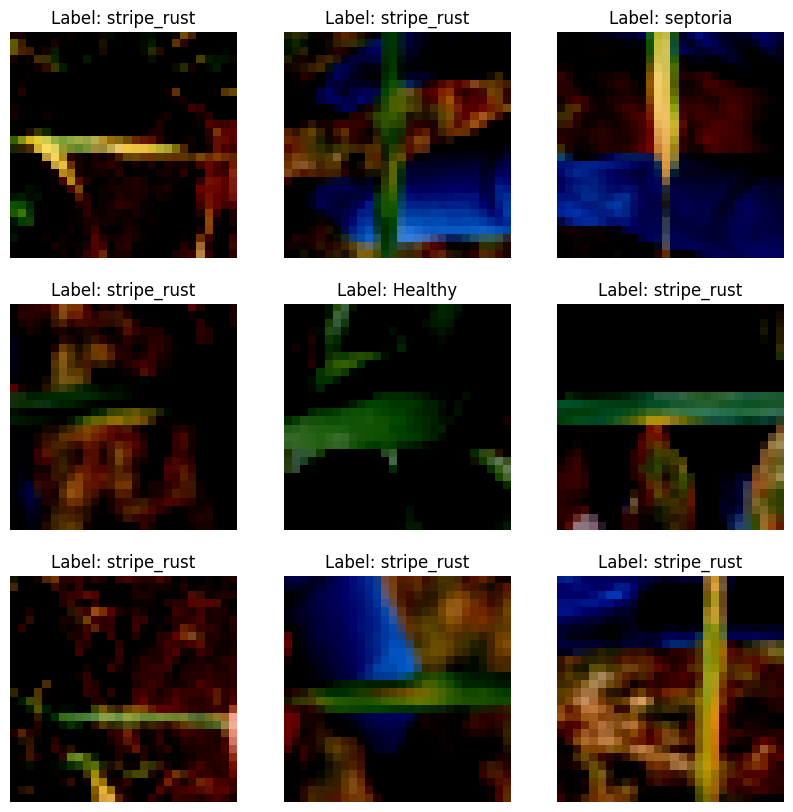

In [3]:
import matplotlib.pyplot as plt
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

dataset = datasets.ImageFolder(root='wheat_leaf', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)

images, labels = next(iter(dataloader))
images, labels = images.to(device), labels.to(device)

images, labels = next(iter(dataloader))
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].permute(1, 2, 0), cmap='gray')  
    plt.title(f"Label: {dataset.classes[labels[i]]}")
    plt.axis('off')
plt.show()


In [4]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [5]:
writer = SummaryWriter()

def visualize(dataiter):
    
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    writer.add_graph(model, images)


In [6]:
def train(num_epochs):
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (i+1) % 10 == 0:
            print('Epoch [{}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

        writer.add_scalar('Loss/train', loss.item(), epoch)


In [7]:
train_loader_iter = iter(dataloader)  
visualize(train_loader_iter)


In [8]:
train(5)
writer.close()

In [1]:
%tensorboard --logdir=runs

UsageError: Line magic function `%tensorboard` not found.
